![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 3 - Discriminative Classification </center>
### <center> K-Nearest Neighbors (K-NN)</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/03_DiscriminativeClassfication/MainKnn.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size':16})

### Generate data:

In [50]:
from sklearn.datasets import make_circles

N          = 500
swap       = 100
mX, vY     = make_circles(N, noise=.03)
vIdx       = np.random.permutation(N)[:swap]
mX[vIdx,:] = mX[np.roll(vIdx, 1),:]

mX.shape, vY.shape

((500, 2), (500,))

### Plot data:

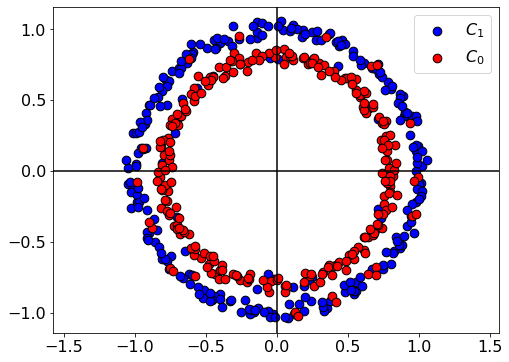

In [58]:
vIdx1 = vY == 1

plt.figure (figsize=(8,6))
plt.scatter(mX[~vIdx1,0], mX[~vIdx1,1], s=75, color='b', edgecolor='k', label='$C_1$')
plt.scatter(mX[ vIdx1,0], mX[ vIdx1,1], s=75, color='r', edgecolor='k', label='$C_0$')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.axis   ('equal')
plt.legend ()
plt.show   ()

### Train a K-NN Classifier:
For $K=1$:
$$\hat{y}\left(\boldsymbol{x}\right)=f_{\text{1--NN}}\left(\boldsymbol{x}\right)=y_{\hat{i}\left(\boldsymbol{x}\right)}$$
where
$$\hat{i}\left(\boldsymbol{x}\right)=\arg\min_{i}d\left(\boldsymbol{x},\boldsymbol{x}_{i}\right)$$

In [59]:
from sklearn.neighbors import KNeighborsClassifier

#-- make grid for plot:
v0       = np.linspace(mX[:,0].min()-0.1, mX[:,0].max()+0.1, 150)
v1       = np.linspace(mX[:,1].min()-0.1, mX[:,1].max()+0.1, 150)
XX0, XX1 = np.meshgrid(v0, v1)
XX       = np.c_[XX0.ravel(), XX1.ravel()]

def PlotKnn(K):
    #-- Train the a K-NN classifier:
    oKnnClassifier = KNeighborsClassifier(n_neighbors=K, p=2).fit(mX, vY)
    
    #-- Plot classification:
    Z = oKnnClassifier.predict(XX)
    Z = Z.reshape(XX0.shape)

    plt.figure  (figsize=(8, 8))
    plt.scatter (mX[~vIdx1,0], mX[~vIdx1,1], s=75, color='b', edgecolor='k', label='$C_1$')
    plt.scatter (mX[ vIdx1,0], mX[ vIdx1,1], s=75, color='r', edgecolor='k', label='$C_0$')
    plt.contourf(XX0, XX1, Z, colors=['blue', 'red'], alpha=0.3, levels=[-0.5, 0.5, 1.5])
    plt.title   (f'$K = {K}$')
    plt.axis    ('equal')

In [60]:
from ipywidgets import interact, IntSlider, Layout

kSlider = IntSlider(min=1, max=15, step=2, value=1, layout=Layout(width='80%'))
interact(PlotKnn, K=kSlider)
plt.show()

interactive(children=(IntSlider(value=1, description='K', layout=Layout(width='80%'), max=15, min=1, step=2), …

### Exercise:
Train a K-NN classifier on the breast cancer data.  
* What is the (train) accuracy when $K=1$?  

In [61]:
from sklearn.datasets import load_breast_cancer

dData = load_breast_cancer()
mX    = dData.data
vY    = dData.target

In [66]:
#-- Normalize data:
mX = mX - np.mean(mX, axis=0)
mX = mX / np.std (mX, axis=0)

mX.shape, vY.shape

((569, 30), (569,))

In [72]:
oKnnClassifier = ???
oKnnClassifier.score(mX, vY)

SyntaxError: invalid syntax (<ipython-input-72-8ff0ddefac5d>, line 1)